# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [27]:
import pandas as pd
import numpy as np
hotels = pd.read_csv("data/hotel_bookings.csv", na_values=np.nan, index_col='Booking_ID')
hotels

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled


## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## Judging Criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## Time is ticking. Good luck! 

## Classification problem: 
- Whether a booking will be fulfilled or cancelled

## Metrics: 
- accuracy, f1_score

------------------------

## My Workflow:
1. EDA (dtypes, duplicates, missing and wrong values, outliers, correlations)
2. Split
3. Data preparation
4. Modeling
5. Model interpretation
6. Storytelling
7. Clean up

# EXPLORATORY DATA ANALYSIS

## Global

In [28]:
hotels.info()

df_hotels = hotels.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          35862 non-null  float64
 1   no_of_children                        35951 non-null  float64
 2   no_of_weekend_nights                  35908 non-null  float64
 3   no_of_week_nights                     35468 non-null  float64
 4   type_of_meal_plan                     35749 non-null  object 
 5   required_car_parking_space            33683 non-null  float64
 6   room_type_reserved                    35104 non-null  object 
 7   lead_time                             35803 non-null  float64
 8   arrival_year                          35897 non-null  float64
 9   arrival_month                         35771 non-null  float64
 10  arrival_date                          35294 non-null  float64
 11  market_seg

- The data type of the features **required_car_parking_space** and **_repeated_guest_** must be set as _categorical_ or _object_  

In [29]:
df_hotels['required_car_parking_space'] = df_hotels['required_car_parking_space'].astype('object')
df_hotels['repeated_guest'] = df_hotels['repeated_guest'].astype('object')

### Size, Duplicates and Missing Values

Dimensions of the dataset:  (36275, 18)


Number of duplicates in the dataset:  7445


no_of_adults : 413 (1.139%)
no_of_children : 324 (0.893%)
no_of_weekend_nights : 367 (1.012%)
no_of_week_nights : 807 (2.225%)
type_of_meal_plan : 526 (1.45%)
required_car_parking_space : 2592 (7.145%)
room_type_reserved : 1171 (3.228%)
lead_time : 472 (1.301%)
arrival_year : 378 (1.042%)
arrival_month : 504 (1.389%)
arrival_date : 981 (2.704%)
market_segment_type : 1512 (4.168%)
repeated_guest : 586 (1.615%)
no_of_previous_cancellations : 497 (1.37%)
no_of_previous_bookings_not_canceled : 550 (1.516%)
avg_price_per_room : 460 (1.268%)
no_of_special_requests : 789 (2.175%)
booking_status : 0 (0.0%)




<Figure size 1500x900 with 0 Axes>

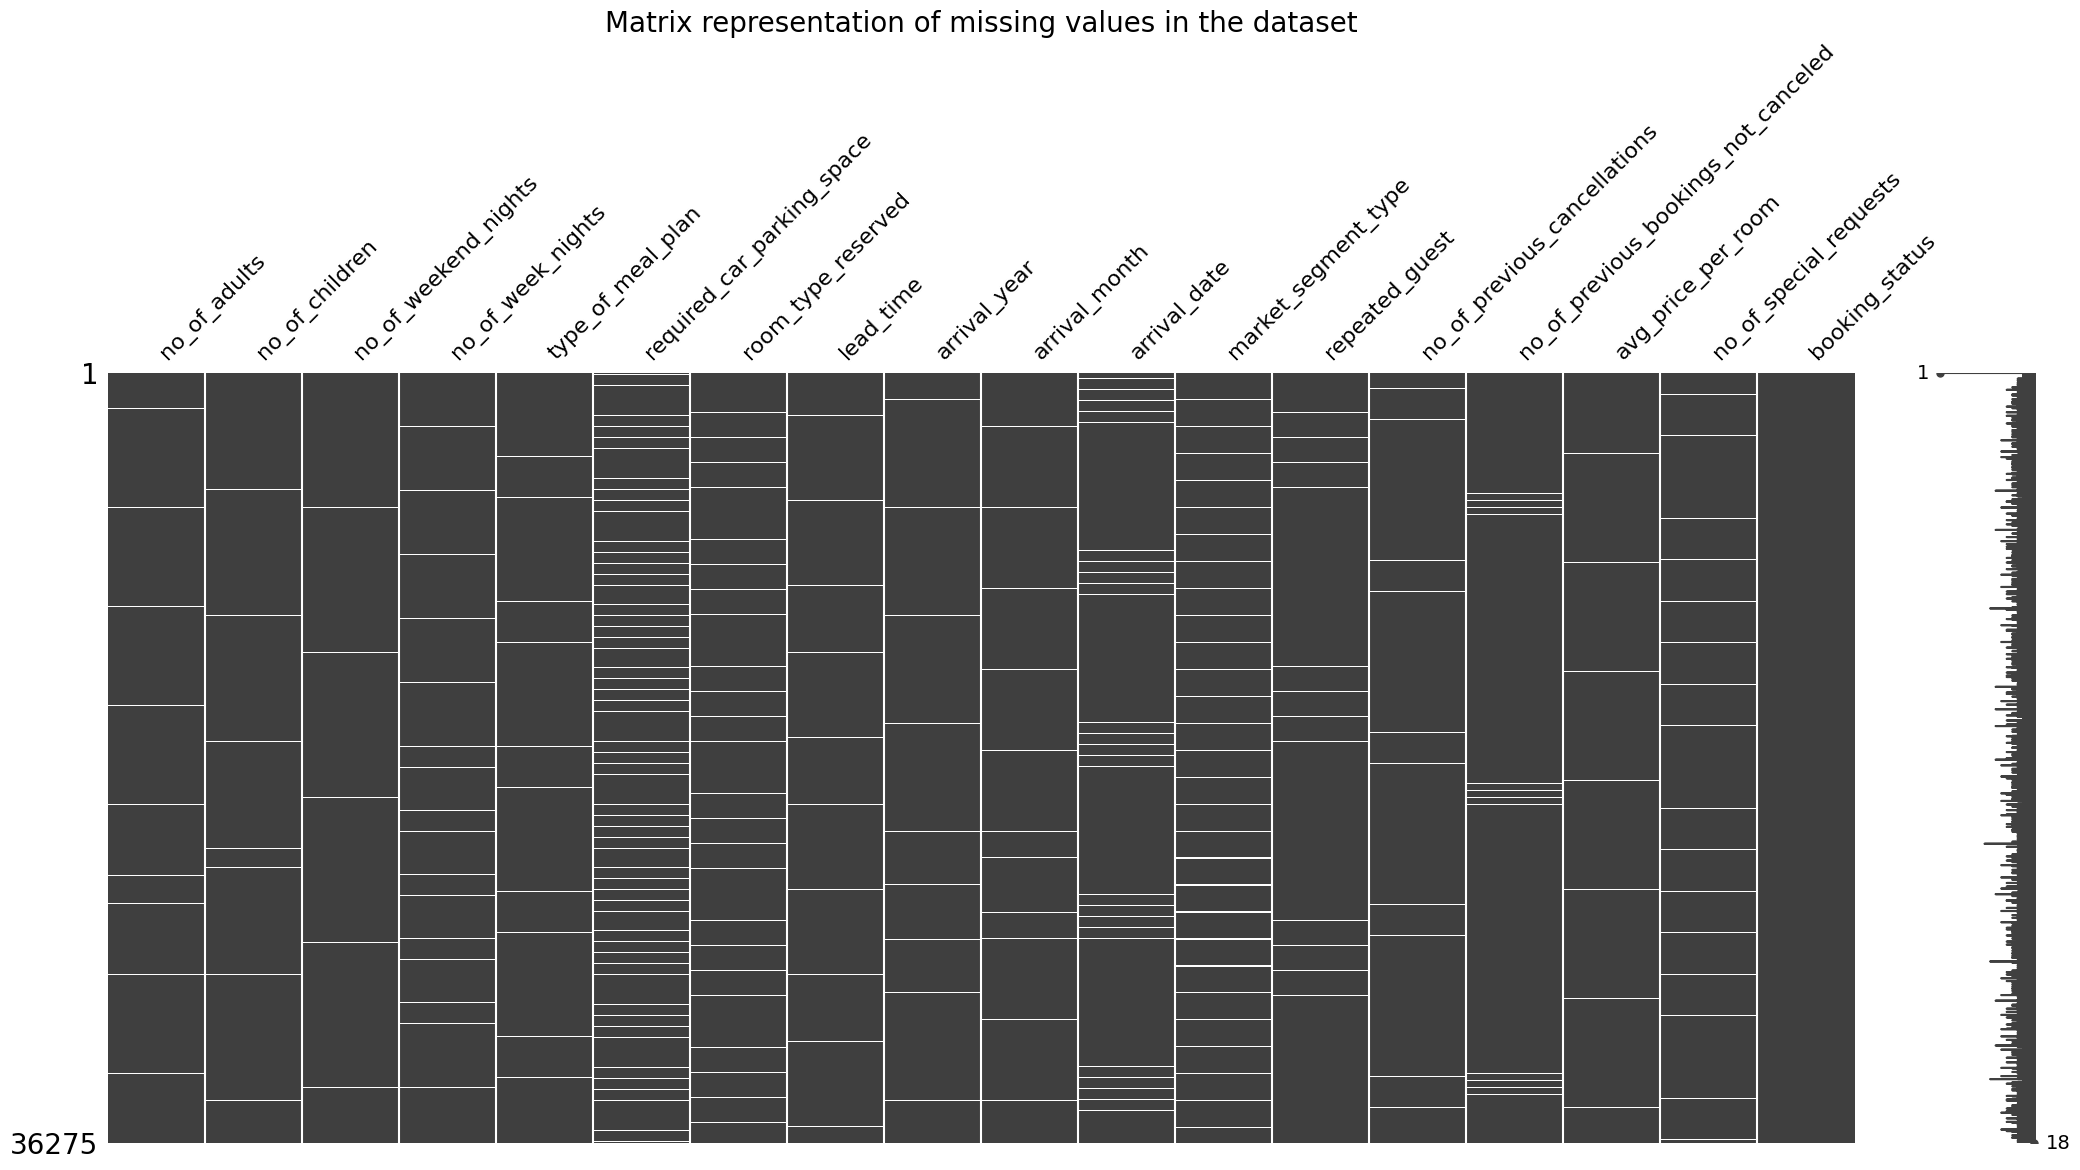

<Figure size 1500x900 with 0 Axes>

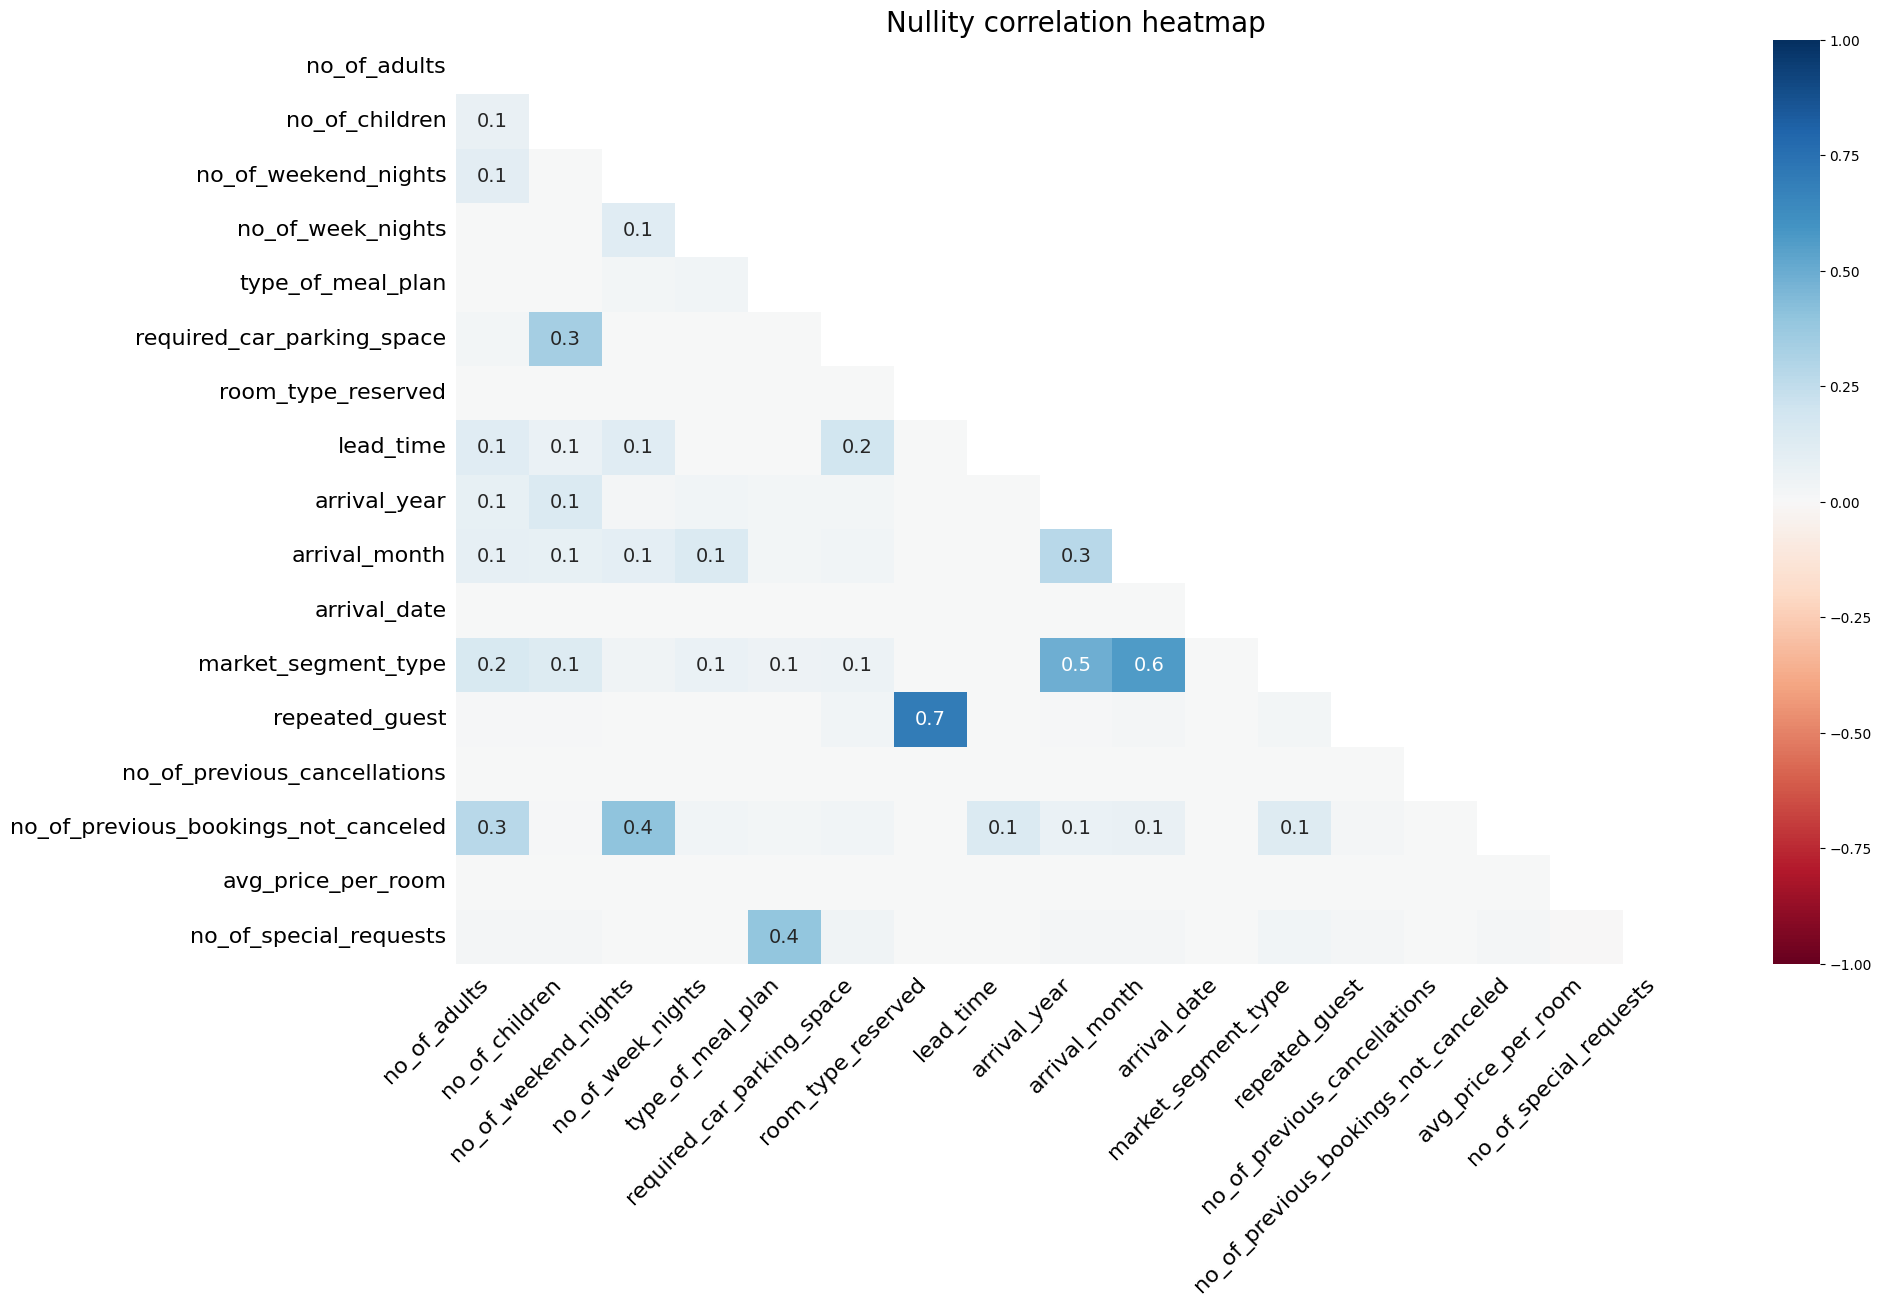

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

print('Dimensions of the dataset: ', df_hotels.shape)
print('\n')

# duplicates
print('Number of duplicates in the dataset: ', df_hotels.duplicated().sum())
print('\n')

# missing values
# summary of missing values in numerical columns (with percentage)
for col in df_hotels.columns:
    miss_count = df_hotels[col].isna().sum()
    perc = (miss_count/df_hotels.shape[0]) * 100
    print('{} : {} ({}%)'.format(col, miss_count, round(perc, 3)))

print('\n')
plt.figure(figsize = (15,9)) 
msno.matrix(df_hotels)
plt.title('Matrix representation of missing values in the dataset', fontsize = 20)
plt.show();

plt.figure(figsize = (15,9)) 
msno.heatmap(df_hotels, labels = True)
plt.title('Nullity correlation heatmap', fontsize = 20)
plt.show();

- There are 7445 duplicates in the dataset. I need to deal with them.
 
- The percent of missingness is less than 10% for each feature, thus I dont drop any feature. Since there are missing values in all features/columns, I dont drop the rows with any missing value, instead, I will use a model to predict the missing values in the numerical columns. 

## Decisions about missing values:
### Categorical columns

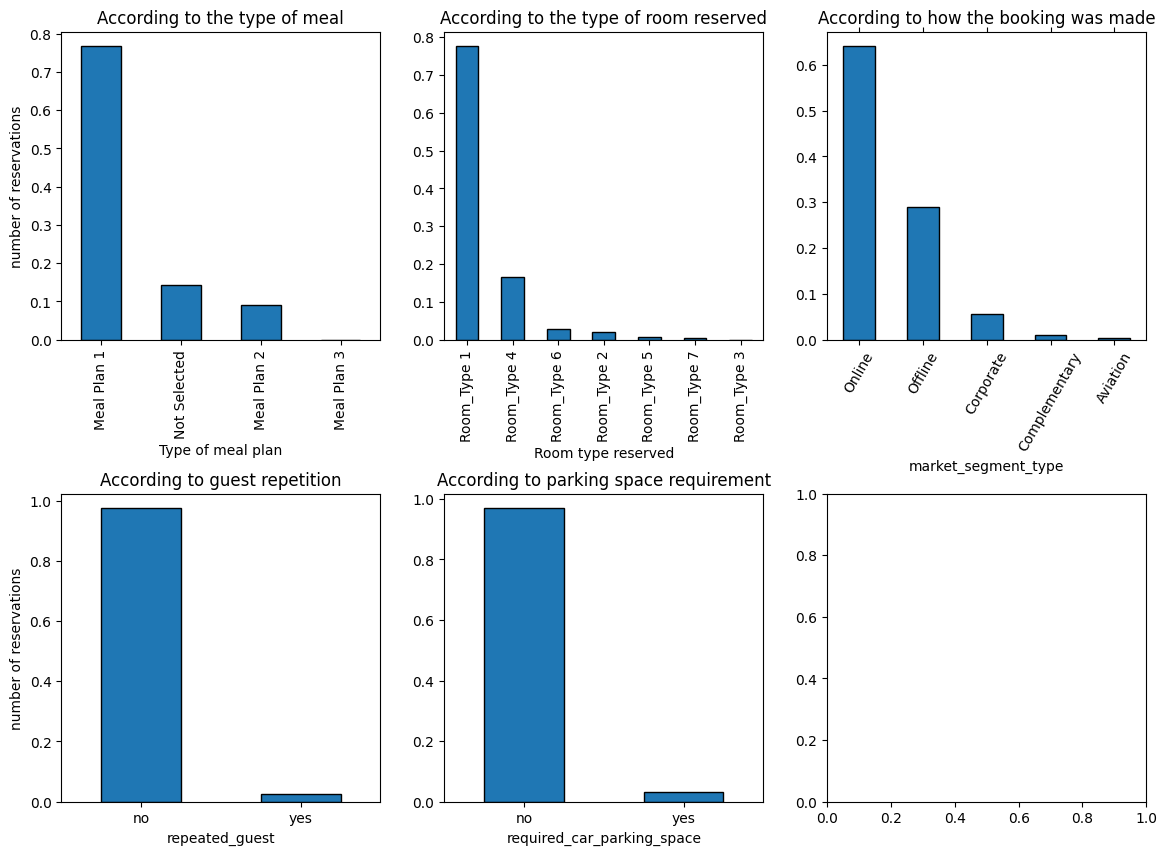

In [24]:
cols_cat = [col for col in df_hotels.columns if df_hotels[col].dtype == 'object']

# unique values of categorical features
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = [14,10])

fig.subplots_adjust(hspace = 0.5, wspace = 0.2)

df_hotels['type_of_meal_plan'].value_counts(normalize=True).plot(kind = 'bar',
                                                   edgecolor = 'black',
                                                   ax = axs[0,0])
axs[0,0].set(title = 'According to the type of meal',
             xlabel = 'Type of meal plan',
             ylabel = 'number of reservations')

# -----------------------------------------------------
df_hotels['room_type_reserved'].value_counts(normalize=True).plot(kind = 'bar',
                                                   edgecolor = 'black',
                                                   ax = axs[0,1])

axs[0,1].set(title = 'According to the type of room reserved',
             xlabel = 'Room type reserved')

# -------------------------------------------------------
df_hotels['market_segment_type'].value_counts(normalize=True).plot(kind = 'bar',
                                                   edgecolor = 'black',
                                                   ax = axs[0,2])

axs[0,2].set(title = 'According to how the booking was made',
             xlabel = 'market_segment_type')

axs[0,2].xaxis.set_tick_params(labelrotation = 60,
                               right=True)

# --------------------------------------------------------

df_hotels['repeated_guest'].value_counts(normalize=True).plot(kind = 'bar',
                                                   edgecolor = 'black',
                                                   ax = axs[1,0])

axs[1,0].set(title = 'According to guest repetition',
             xlabel = 'repeated_guest',
             ylabel = 'number of reservations')

axs[1,0].set_xticklabels(['no', 'yes'],
                         rotation = 0)

# ---------------------------------------------------------
df_hotels['required_car_parking_space'].value_counts(normalize=True).plot(kind = 'bar',
                                                            edgecolor = 'black',
                                                            ax = axs[1,1])

axs[1,1].set(title = 'According to parking space requirement',
             xlabel = 'required_car_parking_space')

axs[1,1].set_xticklabels(['no', 'yes'],
                         rotation = 0);

**Insights:** 
- Nearly 80% of reservations choose the Meal Plan 1 and a Room Type 1
- About 60% of reservations are made online and 30% are made offline
- Nearly 100% of reservations are made by repeated guests and without requiring parking space

**Decision about Missing values**
- For the feature **type_of_meal_plan** I will fill the missing values with the category _Not Selected_
- There is a clear difference between the most frequent category and the rest of categories for all the categorical features. However, since the number of categories is not large in any case, I will fill the missing values in the rest of categorical features with the new category _Unknown_

### Checking for wrong values in numerical columns

In [25]:
# Checking for wrong values
df_hotels.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,35862.000000,35951.000000,35908.000000,35468.00000,35803.000000,35897.000000,35771.000000,35294.000000,35778.000000,35725.000000,35815.000000,35486.000000
mean,1.845017,0.105366,0.810209,2.20331,85.276569,2017.820431,7.424031,15.605712,0.023646,0.154458,103.418207,0.619343
std,0.518652,0.402871,0.870857,1.40989,85.998845,0.383834,3.068277,8.743484,0.370835,1.764805,35.057342,0.785849
min,0.000000,0.000000,0.000000,0.00000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.00000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.00000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.00000,443.000000,2018.000000,12.000000,31.000000,13.000000,58.000000,540.000000,5.000000


- Why the minimum value of the feature **avg_price_per_room** is 0? Isnt that a wrong value? 

In [ ]:
df_hotels[df_hotels['avg_price_per_room'] == 0]

KeyboardInterrupt: 

### Univariate analysis of numerical columns

In [8]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,6))

df_hotels['lead_time'].plot.box(ax = ax[0])

df_hotels['avg_price_per_room'].plot.box(ax = ax[1])


**Insights**:
- Concentration of lead_time between 10-380 days (the data is quite expreaded) with some (not that much) outliers.
- The avg_price_per_room ranges mostly between nearly 200-350 with some outliers.

In [9]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = [9,10])

df_hotels['no_of_adults'].value_counts(normalize=True).plot(kind = 'bar',
                                                            title = 'no_of_adults',
                                                            ylabel = 'number of reservations',
                                                            ax = axs[0,0])

# -----------------------------------------------------
df_hotels['no_of_children'].value_counts(normalize=True).plot(kind = 'bar',
                                                            title = 'no_of_children',
                                                            ylabel = 'number of reservations',
                                                            ax = axs[0,1])

# -----------------------------------------------------
df_hotels['no_of_weekend_nights'].value_counts(normalize=True).plot(kind = 'bar',
                                                            title = 'no_of_weekend_nights',
                                                            ylabel = 'number of reservations',
                                                            ax = axs[1,0])

# -----------------------------------------------------
df_hotels['no_of_week_nights'].value_counts(normalize=True).plot(kind = 'bar',
                                                            title = 'no_of_week_nights',
                                                            ylabel = 'number of reservations',
                                                            ax = axs[1,1])
plt.tight_layout(pad=0.5)
# -----------------------------------------------------
axs[2,0].hist(df_hotels['no_of_previous_cancellations'],
              density=False)
axs[2,0].set(title = 'Histogram of no_of_previous_cancellations',
             xlabel = 'no_of_previous_cancellations',
             ylabel = 'Frequency');
# -----------------------------------------------------
axs[2,1].hist(df_hotels['no_of_previous_bookings_not_canceled'],
        density=False)
axs[2,1].set(title = 'Histogram of no_of_previous_bookings_not_canceled',
             xlabel = 'no_of_previous_bookings_not_canceled',
             ylabel = 'Frequency');
plt.tight_layout(pad=0.5)


fig, ax = plt.subplots(figsize = [4,4]) 
# ----- 'no_of_special_requests' --------
df_hotels['no_of_special_requests'].value_counts(normalize=True).plot(kind = 'bar',
                                                            title = 'no_of_special_requests',
                                                            ylabel = 'number of reservations',
                                                            ax = ax)

**Insights**:
- The number of days before the arrival date the bookings were made are, mostly, between 
- 70% of reservations are for 2 adults.
- Nearly 90% of reservations are without children.
- Nearly 100% of the reservations spend 0, 1 or 2 nights in the weekend. 40% of the reservations does not spend any weekend night.
- Aprox 30% of reservations spend 2 nights in the week
- Nearly 100$ of reservations have no previous cancellations nor previous booked reservation no cancellations. These are new customers. 

## Dates columns

In [10]:
# Checking the year, month and date columns to deal with missing values later
import seaborn as sns

# ----- 'arrival_year' --------
fig, ax = plt.subplots(figsize = [4,4]) 
df_hotels['arrival_year'].value_counts(normalize = True).plot(kind = 'bar',
                                                            title = 'No. of reservations per year',
                                                            ylabel = 'reservations',
                                                            ax = ax);

fig, ax = plt.subplots(ncols = 2, figsize = [9,4]) 
df_hotels[df_hotels['arrival_year'] == 2018]['arrival_month'].value_counts().plot(kind = 'bar',
                                                                                  title = 'No. of reservations per month in 2018',
                                                                                  ylabel = 'reservations',
                                                                                  ax = ax[0]);

df_hotels[df_hotels['arrival_year'] == 2017]['arrival_month'].value_counts().plot(kind = 'bar',
                                                                                  title = 'No. of reservations per month in 2017',
                                                                                  ylabel = 'reservations',
                                                                                  ax = ax[1]);




**Insights**:
- 80% of reservations are made in 2018

In [11]:
bool_months = df_hotels['arrival_month'].isna()
display(df_hotels[bool_months])

- data types

**required_car_parking_space** is categorical (no necesita onehotencoder)

**arrival_month** is categorical ordinal

**arrival_date is** categorical ordinal

**repeated_guest** is categorical (no necesita onehotencoder)

- feature engineering
**arrival_date** convertirlo en weekday

**avg_price_per_room** to check how many 0 values. If there are many replace them with ...



In [12]:
# Target distribution

# 'booking_status'
display(df_hotels.loc[:, 'booking_status'].value_counts(normalize = True))

fig, ax = plt.subplots(figsize = [6,5])

df_hotels['booking_status'].value_counts(normalize = True).plot(kind='bar',
                                                                color=['chocolate', 'royalblue'],
                                                                ax = ax)

ax.set(title = 'booking_status (target) distribution',
       xlabel = 'booking_status values');

In [13]:
# General visual data overview 

cols_num = ['no_of_adults',                            
            'no_of_children',                          
            'no_of_weekend_nights',                    
            'no_of_week_nights',
            'lead_time',
            'no_of_previous_cancellations',             
            'no_of_previous_bookings_not_canceled',     
            'avg_price_per_room',                       
            'no_of_special_requests',
            'booking_status']

sns.pairplot(df_hotels[cols_num],
             hue = 'booking_status');

In [14]:
# Closer look to outliers
import seaborn as sns

fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = [14,15])

# 'no_of_children'
df_hotels['no_of_children'].hist(ax = axs[0,0])
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel('no_of_children')

sns.scatterplot(x = 'no_of_week_nights',
                y = 'no_of_children',
                data = df_hotels,
                hue = 'booking_status',
                ax = axs[0,1]);

# 'no_of_previous_cancellations'
df_hotels['no_of_previous_cancellations'].hist(ax = axs[1,0])
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel('no_of_previous_cancellations')

sns.scatterplot(x = 'no_of_week_nights',
                y = 'no_of_previous_cancellations',
                data = df_hotels,
                hue = 'booking_status',
                ax = axs[1,1]);

# 'avg_price_per_room'
df_hotels['avg_price_per_room'].hist(ax = axs[2,0])
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('avg_price_per_room')

sns.scatterplot(x = 'no_of_week_nights',
                y = 'avg_price_per_room',
                data = df_hotels,
                hue = 'booking_status',
                ax = axs[2,1]);


In [15]:
# Checking for features correlation

plt.figure(figsize = [10,8])

mask = np.triu(np.ones_like(df_hotels.corr(),
               dtype = np.bool))

heatmap = sns.heatmap(df_hotels.corr(),
                      mask = mask,
                      annot = True)
heatmap.set_title('Heatmap of correlation matrix')

plt.show()


In [16]:
# Exploring the date columns ('arrival_year', 'arrival_month', 'arrival_date') closely
fig, ax = plt.subplots(ncols = 2, figsize = [10,4])

sns.scatterplot(x = 'arrival_year',
                y = 'avg_price_per_room',
                hue = 'booking_status',
                data = df_hotels,
                ax = ax[0]);

ax[0].set_xticks([2017, 2018]) 
ax[0].set_xticklabels([2017, 2018])

sns.scatterplot(x = 'arrival_year',
                y = 'arrival_month',
                hue = 'booking_status',
                data = df_hotels,
                ax = ax[1]);

ax[1].set_xticks([2017, 2018]) 
ax[1].set_xticklabels([2017, 2018])



In [17]:
# 'arrival_year' vs 'avg_price_per_room'
print('arrival_year vs avg_price_per_room')

df_hotels_2017 = df_hotels.loc[df_hotels.loc[:,'arrival_year'] == 2017, ['avg_price_per_room','arrival_year']]

max_value = df_hotels_2017.max()

display(df_hotels_2017.head(10))

display(max_value)

display(df_hotels_2017.shape)

display(df_hotels_2017.isna().sum())

df_hotels_2018 = df_hotels.loc[df_hotels.loc[:,'arrival_year'] == 2018, ['avg_price_per_room','arrival_year']]

display(df_hotels_2018.shape)

display(df_hotels_2018.isna().sum())

# 'arrival_year' vs 'arrival_month'
print('arrival_year vs arrival_month \n')
df_hotels_months_2017 = df_hotels.loc[df_hotels['arrival_year'] == 2017, ['arrival_year', 'arrival_month']]

print('Values distribution for arrival_month in arrival_year = 2017:\n', df_hotels_months_2017['arrival_month'].value_counts())
print('\n')
print('Missing values in arrival_month in arrival_year = 2017:\n', df_hotels_months_2017.isna().sum())

df_hotels.groupby('arrival_year')['arrival_month'].agg(['mean','std','median'])

df_hotels_months_2018 = df_hotels.loc[df_hotels['arrival_year'] == 2018, ['arrival_year', 'arrival_month']]
print('Values distribution for arrival_month in arrival_year = 2018:\n', df_hotels_months_2018['arrival_month'].value_counts())
print('\n')
print('Missing values in arrival_month in arrival_year = 2018:\n', df_hotels_months_2018.isna().sum())

# ---------------------------------------------

fig, axs = plt.subplots(ncols = 2, figsize = [14,5], sharey = True)

df_hotels_months_2017.value_counts(normalize = True).plot(kind='bar',
                                                          ax = axs[0])
axs[0].set(title = 'booking_status (target) distribution in 2017',
       xlabel = 'months in 2017');

df_hotels_months_2018.value_counts(normalize = True).plot(kind='bar',
                                                          ax = axs[1])

axs[1].set(title = 'booking_status (target) distribution in 2018',
           xlabel = 'months in 2018');

# DROP ROWS WITH NAN IN ALL COLUMNS AND DATA SPLIT

In [31]:
from sklearn.model_selection import train_test_split

# DROPPING ROWS WITH NAN IN ALL COLUMNS
#nan_indices = df_hotels[df_hotels.isnull().all(axis=1)].index
#display(df_hotels.loc[nan_indices,:])

df_hotels = df_hotels.dropna(how = 'all')

# -------------------------------------------------------------------------------------------------------------------------
# SPLIT DATA
# In the first step we will split the data in training and remaining dataset
df_features_train, df_features_rem, df_target_train, df_target_rem = train_test_split(df_hotels.drop('booking_status', axis = 1), 
                                                                                      df_hotels['booking_status'],
                                                                                      train_size=0.8, 
                                                                                      random_state=42)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
df_features_valid, df_features_test, df_target_valid, df_target_test = train_test_split(df_features_rem,df_target_rem,
                                                                                        test_size=0.5)

# CLEANING DATA
## VERSION 1:

## Missing Values

In [32]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def cleaning_data(df_train, df_totransform):
    '''
    function that deal with missing values in df...
    '''

    df = df_train.copy()
    
    # ----------------------- NUMERICAL COLUMNS ---------------------------
    # numerical columns
    cols_num = [col for col in df.columns if df[col].dtype != 'object']
    
    # Instantiate the model
    knn_imp = KNNImputer(n_neighbors = 3) # the 3 most similar rows in the training data with no missing values in some columns
    
    # ---------------------- CATEGORICAL COLUMNS -----------------------
    
    # categorical columns except 'type_of_meal_plan'
    cols_cat = [col for col in df.columns if df[col].dtype == 'object' if col != 'type_of_meal_plan']
    
    # Instantiate the imputers
    cat_imp = SimpleImputer(strategy = 'constant', fill_value = 'Unknown')
    cat_meal_plan = SimpleImputer(strategy = 'constant', fill_value = 'Not Selected')
    
    # ---------------------- COLUMN TRANSFORMER ---------------------------
    
    data_cleaning = ColumnTransformer([('num_miss', knn_imp, cols_num),
                                       ('cat_prep', cat_imp, cols_cat),
                                       ('cat_meal_plan', cat_meal_plan, ['type_of_meal_plan'])],
                                       remainder = 'passthrough')
    
    # Fitting the ColumnTransformer to the training data
    data_cleaning.fit(df)
    
    # Transforming the data with the fitted ColumnTransformer 
    arrayTransformed = data_cleaning.transform(df_totransform)
    
    # dataframe with clean data 
    df_clean = pd.DataFrame(arrayTransformed,
                            columns = cols_num + cols_cat + ['type_of_meal_plan'],
                            index = df_totransform.index)
    
    display(df_clean.info())
    display(df_clean.head())
    
    return df_clean

# Training dataset
df_features_train_clean = cleaning_data(df_features_train, df_features_train)

# Test dataset
df_features_test_clean = cleaning_data(df_features_train, df_features_test)

# Validation dataset
df_features_valid_clean = cleaning_data(df_features_train, df_features_valid)

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, INN25630 to INN15796
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   no_of_adults                          29020 non-null  object
 1   no_of_children                        29020 non-null  object
 2   no_of_weekend_nights                  29020 non-null  object
 3   no_of_week_nights                     29020 non-null  object
 4   lead_time                             29020 non-null  object
 5   arrival_year                          29020 non-null  object
 6   arrival_month                         29020 non-null  object
 7   arrival_date                          29020 non-null  object
 8   no_of_previous_cancellations          29020 non-null  object
 9   no_of_previous_bookings_not_canceled  29020 non-null  object
 10  avg_price_per_room                    29020 non-null  object
 11  no_of_special_requests 

None

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,type_of_meal_plan
Booking_ID,,,,,,,,,,,,,,,,,
INN25630,2.0,1.0,2.0,1.0,26.0,2017.0,10.0,17.0,0.0,0.0,161.0,0.0,0.0,Room_Type 1,Online,0.0,Meal Plan 1
INN14474,2.0,1.0,1.0,1.0,98.0,2018.0,7.0,16.0,0.0,0.0,121.5,2.0,0.0,Room_Type 1,Online,0.0,Meal Plan 1
INN23721,2.0,0.0,0.0,3.0,433.0,2018.0,9.0,8.0,0.0,0.0,70.0,0.0,0.0,Room_Type 1,Offline,0.0,Meal Plan 1
INN05844,2.0,0.0,2.0,5.0,195.0,2018.0,8.0,8.0,0.0,0.0,72.25,0.0,0.0,Room_Type 1,Offline,0.0,Meal Plan 1
INN18710,1.0,0.0,0.0,2.0,188.0,2018.0,6.0,15.0,0.0,0.0,130.0,0.0,0.0,Room_Type 1,Offline,0.0,Meal Plan 1


<class 'pandas.core.frame.DataFrame'>
Index: 3628 entries, INN19937 to INN20578
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   no_of_adults                          3628 non-null   object
 1   no_of_children                        3628 non-null   object
 2   no_of_weekend_nights                  3628 non-null   object
 3   no_of_week_nights                     3628 non-null   object
 4   lead_time                             3628 non-null   object
 5   arrival_year                          3628 non-null   object
 6   arrival_month                         3628 non-null   object
 7   arrival_date                          3628 non-null   object
 8   no_of_previous_cancellations          3628 non-null   object
 9   no_of_previous_bookings_not_canceled  3628 non-null   object
 10  avg_price_per_room                    3628 non-null   object
 11  no_of_special_requests  

None

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,type_of_meal_plan
Booking_ID,,,,,,,,,,,,,,,,,
INN19937,1.0,0.0,0.0,3.0,71.0,2018.0,6.0,14.0,0.0,0.0,120.0,0.0,Unknown,Room_Type 1,Offline,0.0,Meal Plan 1
INN09933,2.0,0.0,1.0,2.0,233.0,2018.0,10.0,14.0,0.0,0.0,90.0,0.0,0.0,Room_Type 1,Offline,0.0,Meal Plan 1
INN20647,1.0,0.0,4.0,6.0,28.0,2018.0,11.0,25.0,0.0,0.0,148.91,1.0,0.0,Unknown,Online,Unknown,Meal Plan 1
INN07303,2.0,0.0,0.0,1.0,5.0,2018.0,3.0,23.0,0.0,0.0,89.0,0.0,0.0,Room_Type 1,Online,0.0,Not Selected
INN26792,2.0,0.0,0.0,2.0,35.0,2018.0,3.0,11.0,0.0,0.0,71.1,0.0,0.0,Room_Type 1,Online,0.0,Not Selected


<class 'pandas.core.frame.DataFrame'>
Index: 3627 entries, INN11196 to INN24869
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   no_of_adults                          3627 non-null   object
 1   no_of_children                        3627 non-null   object
 2   no_of_weekend_nights                  3627 non-null   object
 3   no_of_week_nights                     3627 non-null   object
 4   lead_time                             3627 non-null   object
 5   arrival_year                          3627 non-null   object
 6   arrival_month                         3627 non-null   object
 7   arrival_date                          3627 non-null   object
 8   no_of_previous_cancellations          3627 non-null   object
 9   no_of_previous_bookings_not_canceled  3627 non-null   object
 10  avg_price_per_room                    3627 non-null   object
 11  no_of_special_requests  

None

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,type_of_meal_plan
Booking_ID,,,,,,,,,,,,,,,,,
INN11196,2.0,1.0,2.0,4.0,37.0,2018.0,3.0,23.0,0.0,0.0,127.8,2.0,0.0,Room_Type 1,Online,0.0,Meal Plan 1
INN17704,1.0,0.0,1.0,2.0,177.0,2018.0,7.0,18.0,0.0,0.0,77.03,0.0,0.0,Room_Type 1,Online,0.0,Meal Plan 1
INN28320,2.0,0.0,2.0,3.0,108.0,2018.0,9.0,24.0,0.0,0.0,127.38,3.0,0.0,Room_Type 2,Online,0.0,Meal Plan 1
INN27783,2.0,0.0,1.0,3.0,189.0,2018.0,8.0,8.0,0.0,0.0,72.25,0.0,0.0,Room_Type 1,Offline,0.0,Meal Plan 1
INN22532,2.0,0.0,0.0,1.0,2.0,2018.0,3.0,30.0,0.0,0.0,101.0,2.0,0.0,Room_Type 1,Online,0.0,Meal Plan 1


## Dealing with Outliers

In [12]:
from sklearn.impute import KNNImputer

# Instantiate the model
knn_imp = KNNImputer(n_neighbors = 3) # the 3 most similar rows in the training data with no missing values in some columns
# Fitting the model
knn_imp.fit(df)

# Applying the model
X = knn_imp.transform(df)

# Building dataframe
df = pd.DataFrame(X, 
                  index = df_features_train.index,
                  columns = cols_num)

df.info()

df_features_train[cols_num] = df

# CLEANING, SCALING AND ONE-HOT-ENCODING DATA  
## VERSION 2:

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# DATES COLUMNS
# Imputing missing values in columns 'arrival_year' and 'arrival_month'


cols_yearmonth = ['arrival_year',
                  'arrival_month']

imputer_date = SimpleImputer(strategy = "most_frequent")

year_month_transformed = pd.DataFrame(imputer_date.fit_transform(df_features_train[cols_yearmonth]),
                                      index = df_features_train.index,
                                      columns = cols_yearmonth)

# # TO SAVE THE FITTED imputer_date !!!

# imputing with MICE the missing values in 'arrival_date'
year_month_transformed['arrival_date'] = df_features_train['arrival_date']

df_mice = year_month_transformed.copy()

# define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), 
                                n_nearest_features=None, 
                                imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), 
                               index = df_mice.index,
                               columns=df_mice.columns)

# # TO SAVE THE FITTED mice_imputer !!!!

# plotting the MICE imputation results
fig = plt.Figure()

null_values = df_features_train['arrival_date'].isnull() 

fig = df_mice_imputed.plot(x = 'arrival_month', 
                           y = 'arrival_date', 
                           kind='scatter', 
                           c=null_values, 
                           cmap='winter', 
                           title='MICE Imputation for arrival_date', 
                           colorbar=False)

df_features_train.loc[:, ['arrival_year', 'arrival_month', 'arrival_date']] = df_mice_imputed

df_features_train.isna().sum()

# -------------------------------------------------------------------------------------------------------------------------
# NUMERICAL COLUMNS

# columns to impute with the median
cols_num_median = ['no_of_weekend_nights',
                   'no_of_week_nights',
                   'lead_time',
                   'avg_price_per_room']

# columns to impute with the mode
cols_num_mode = ['no_of_adults',
                 'no_of_children',
                 'no_of_previous_cancellations',
                 'no_of_previous_bookings_not_canceled',
                 'no_of_special_requests']

# pipeline for cleaning(imputing by the median) and scaling num cols 
num_median_preprocessing = Pipeline([('imputer_median', SimpleImputer(strategy = "median")),
                                     ('scaler', StandardScaler())
                                    ])

# pipeline for cleaning(imputing by the mode) ans scaling num cols
num_mode_preprocessing = Pipeline([('imputer_mode', SimpleImputer(strategy = "most_frequent")),
                                   ('scaler', StandardScaler())
                                  ])

# -------------------------------------------------------------------------------------------------------------------------
# CATEGORICAL COLUMNS

# non-binary categorical columns
cols_cat = ['type_of_meal_plan',
            'room_type_reserved',
            'market_segment_type']

# binary categorical columns
cols_binary = ['required_car_parking_space',
               'repeated_guest']

# changing dtype for categorical features and adding the category 'unknown'
for col in cols_cat:
    df_features_train[col] = df_features_train[col].astype('category')
    df_features_train[col] = df_features_train[col].cat.add_categories('Unknown')

# pipeline for cleaning and onehotencoding the non-binary categorical columns 
categorical_preprocessing = Pipeline([('cat_imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
                                      ('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'))
                                     ])
# pipeline for cleaning and onehotencoding the binary categorical columns
binary_preprocessing = Pipeline([('bina_imputer', SimpleImputer(strategy = 'most_frequent'))
                                ])
# -------------------------------------------------------------------------------------------------------------------------
# CREATING THE COLUMN TRANSFORMER WITH THE PIPELINES (CLEANING AND ONEHOTENCODING) FOR NUMERICAL AND CATEGORICAL COLUMNS

data_preprocessor = ColumnTransformer([('num_med', num_median_preprocessing, cols_num_median),
                                       ('num_mod', num_mode_preprocessing, cols_num_mode),
                                       ('cat', categorical_preprocessing, cols_cat),
                                       ('binary', binary_preprocessing, cols_binary)],
                                       remainder = 'passthrough')

# getting the names of the features (columns)
columns_cat = data_preprocessor.named_transformers_['cat'].named_steps['ohe'].get_feature_names(cols_cat)
columns_left = ['arrival_year',
                'arrival_month',
                'arrival_date']

# Training dataset
# fitting and transform the preprocessor
array_features_preprocessed = data_preprocessor.fit_transform(df_features_train)

# converting the array into a dataframe (not necessary, just for checking results)
df_features_train_processed = pd.DataFrame(array_features_preprocessed,
                                           columns = cols_num_median + cols_num_mode + list(columns_cat) + cols_binary + columns_left,
                                           index = df_features_train.index)

# checking results of preprocessing on training features 
display(df_features_train_processed.head())

# Validation dataset 

# Test dataset

### Target

In [9]:
# Changing dtype of target
#df_hotels['Booking_status'] = df_hotels['Booking_status'].astype('category')

# FEATURE ENGINEERING 
- Extracting from **arrival_year**, **arrival_month** and **arrival_date**:
1.                              - the **_weekday_**  
2.                              - the **_season_** (high_season (1): jun-oct  low_season (0): nov-may)
                           
- Adding the feature **_no_of_days_reserved_**: Total of reserved days for a reservation. 

In [33]:
# FEATURES ENGINEERING
from datetime import datetime

def features_engineer(df):
    '''
    function that modifies features accordingly...
    '''
    
# ----- WEEKDAY COLUMN ------- #

    # Change to int the type of arrival_year, arrival_month and arrival_date
    df['arrival_year'] = df['arrival_year'].astype('int')
    df['arrival_month'] = df['arrival_month'].astype('int')
    df['arrival_date'] = df['arrival_date'].astype('int')
    
    # Rename the year, month and date columns (maybe not necessary)
    df = df.rename(columns={'arrival_date': 'day',
                            'arrival_month': 'month',
                            'arrival_year': 'year'})
    
    # Checking for wrong values in the dates columns
    #display(df.groupby('month')['day'].agg('max'))
    
    # Correcting the wrong values in dates
    df.loc[(df['month'] == 2) & (df['day'] >= 29), ['month','day']] = [3,1]
    df.loc[(df['month'] == 4) & (df['day'] == 31), ['month','day']] = [5,1]
    df.loc[(df['month'] == 9) & (df['day'] == 31), ['month','day']] = [10,1]
    df.loc[(df['month'] == 11) & (df['day'] == 31),  ['month','day']] = [12,1]
    
    # Creating the date column with type datetime
    df['date'] = pd.to_datetime(df[['day', 'month', 'year']], format='%d-%m-%Y')
    df['date'] = pd.to_datetime(df['date'])
    
    # Create the column weekday from date column
    df["arrival_weekday"] = df['date'].dt.weekday
    
# ------- SEASON COLUMN ------- #

    highseason_mask = (df['month'] >= 6) & (df['month'] <= 10)
    
    df.loc[highseason_mask, 'season'] = 'High'
    
    df.loc[~highseason_mask, 'season'] = 'Low'
    
    
# -------  NO. DAYS IN HOTEL COLUMN ------- #

    df['no_of_days_reserved'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
    
# Dropping the unnecessary columns    
    df = df.drop(['year', 'month', 'day', 'date'], axis = 1)
    
    df.head()
        
    return df   

# Training dataset
df_features_train_fe = features_engineer(df_features_train_clean)

# Test dataset
df_features_test_fe = features_engineer(df_features_test_clean)

# Validation dataset
df_features_valid_fe = features_engineer(df_features_valid_clean)

In [9]:
df_features_train_fe.head()

In [19]:
fig, ax = plt.subplots(figsize = [4,4])

df.loc[:,'arrival_weekday'].value_counts().plot(kind = 'bar',
                                                            title = 'No. reservations per day of the week',
                                                            ylabel = 'reservations',
                                                            ax = ax);

# BASELINEMODEL
1.  Logistic Regression
2.  Random Forest + Decision Tree
3.  SVM

In [34]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
# METRICS
results_logreg = pd.DataFrame(columns = ['resamp_stragy', 'recall_score', 'precision_score', 'accuracy_score'])

# -------------------------------------------------------------------------------
# RESAMPLING THE TARGET

# Instantiante resampling techniques:
oversampler = RandomOverSampler(random_state = 42)
undersampler = RandomUnderSampler(random_state = 42)
smotesampler = SMOTE(random_state = 42) 

# List of tuples with resampling techniques + (giving weights)

samplers = [('oversamp', oversampler),             # oversampling
            ('undersamp', undersampler),           # undersampling
            ('SMOTE', smotesampler),               # SMOTE oversampling
            ('class_weights', 'passthrough')]      # balancing by giving weights  

# --------------------------------------------------------------------------------
# ONE HOT ENCODING CAT COLUMNS AND STANDARDIZATION NUM COLUMNS

cols_cat = [col for col in df_features_train_fe.columns if df_features_train_fe[col].dtype == 'object']
cols_num = [col for col in df_features_train_fe.columns if df_features_train_fe[col].dtype != 'object']

# Instantiate One Hot Encoder
ohe_unique_list = [df_features_train_fe[c].unique().tolist() for c in cols_cat]

ohe_cols = OneHotEncoder(categories = ohe_unique_list,
                         sparse = False,
                         handle_unknown = 'ignore')

# Instantiate the scaler
scaler = StandardScaler()

# Instantiate the preprocessor with columntransformer
preprocessor = ColumnTransformer([('ohe', ohe_cols, cols_cat),
                                  ('scaler', scaler, cols_num)],
                                   remainder = 'passthrough')

# --------------------------------------------------------------------------------
# MODEL

i = 0

for name, sampler in samplers:
    
    
    pipe_logreg = Pipeline([('preprocess', preprocessor),
                            (name, sampler),
                            ('Log_Reg', LogisticRegression(solver = 'saga',
                                                           max_iter = 100,
                                                           class_weight = 'balanced',
                                                           random_state = 42))])
    
    pipe_logreg.fit(df_features_train_fe, df_target_train)
    
    model_logreg_preds = pipe_logreg.predict(df_features_test_fe)
    
    recall_logreg = recall_score(df_target_test, model_logreg_preds)
    precision_logreg = precision_score(df_target_test, model_logreg_preds)
    accuracy_logreg = accuracy_score(df_target_test, model_logreg_preds)
    
    results_logreg.loc[i, :] = [name, recall_logreg, precision_logreg, accuracy_logreg]
    
    i = i + 1
    
results_logreg = results_logreg.set_index('resamp_stragy')

print("Logistic Regression\n-------------------------")
display(results_logreg)